### Input data
Csv file in the format
```
program, method, memory size, explored, optimum, time, design space size
```
that contains the results of runnig PAYNT for a set amount of time for each program and setup (using the basic Iterative approach, Injection approach, and Incremental restrictions approach).

In [277]:
import pandas as pd
import seaborn as sns

out = pd.read_csv("../workspace/log/output.csv", sep=",",
                  names=["program", "method", "memory_size", "explored",
                         "optimum", "time", "design_space_size"],
                  )
out["optimum"] = pd.to_numeric(out["optimum"], errors="coerce")
out = out.where(out["time"] > 0).dropna()
out = out.where(out["memory_size"] > 2).dropna()

for method in out["method"].unique():
    if (method not in ["Iterative", "Injection"]):
        out["method"] = out["method"].replace(method, "Incremental")


In [278]:
grouped = out.where((out["program"].str.contains("grid")) & (out["program"].str.contains("simple") == False)).dropna().groupby([
    "program", "method", "memory_size"
]).agg({"optimum": "max", "time": "sum"})

grouped = grouped.append(
    out.where(
        (out["program"].str.contains("grid")) & (out["program"].str.contains("simple")) |
        (out["program"].str.contains("maze"))
    ).dropna().groupby([
        "program", "method", "memory_size"
    ]).agg({"optimum": "min", "time": "sum"})
)
grouped = grouped.reset_index()
grouped.where(grouped["program"] == "workspace/examples/pomdp/grid/center/sketch.templ").dropna()

,program,method,memory_size,optimum,time
44,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,3.0,0.773992,1.022310
45,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,4.0,0.846590,7.281308
46,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,5.0,0.904572,45.156422
47,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,6.0,0.920209,228.459761
48,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,7.0,0.920209,5.553747
49,workspace/examples/pomdp/grid/center/sketch.templ,Injection,3.0,0.773992,0.132849
50,workspace/examples/pomdp/grid/center/sketch.templ,Injection,4.0,0.846590,0.954175
51,workspace/examples/pomdp/grid/center/sketch.templ,Injection,5.0,0.846590,9.164819
52,workspace/examples/pomdp/grid/center/sketch.templ,Injection,6.0,0.846590,144.637798
53,workspace/examples/pomdp/grid/center/sketch.templ,Iterative,3.0,0.773992,0.617651


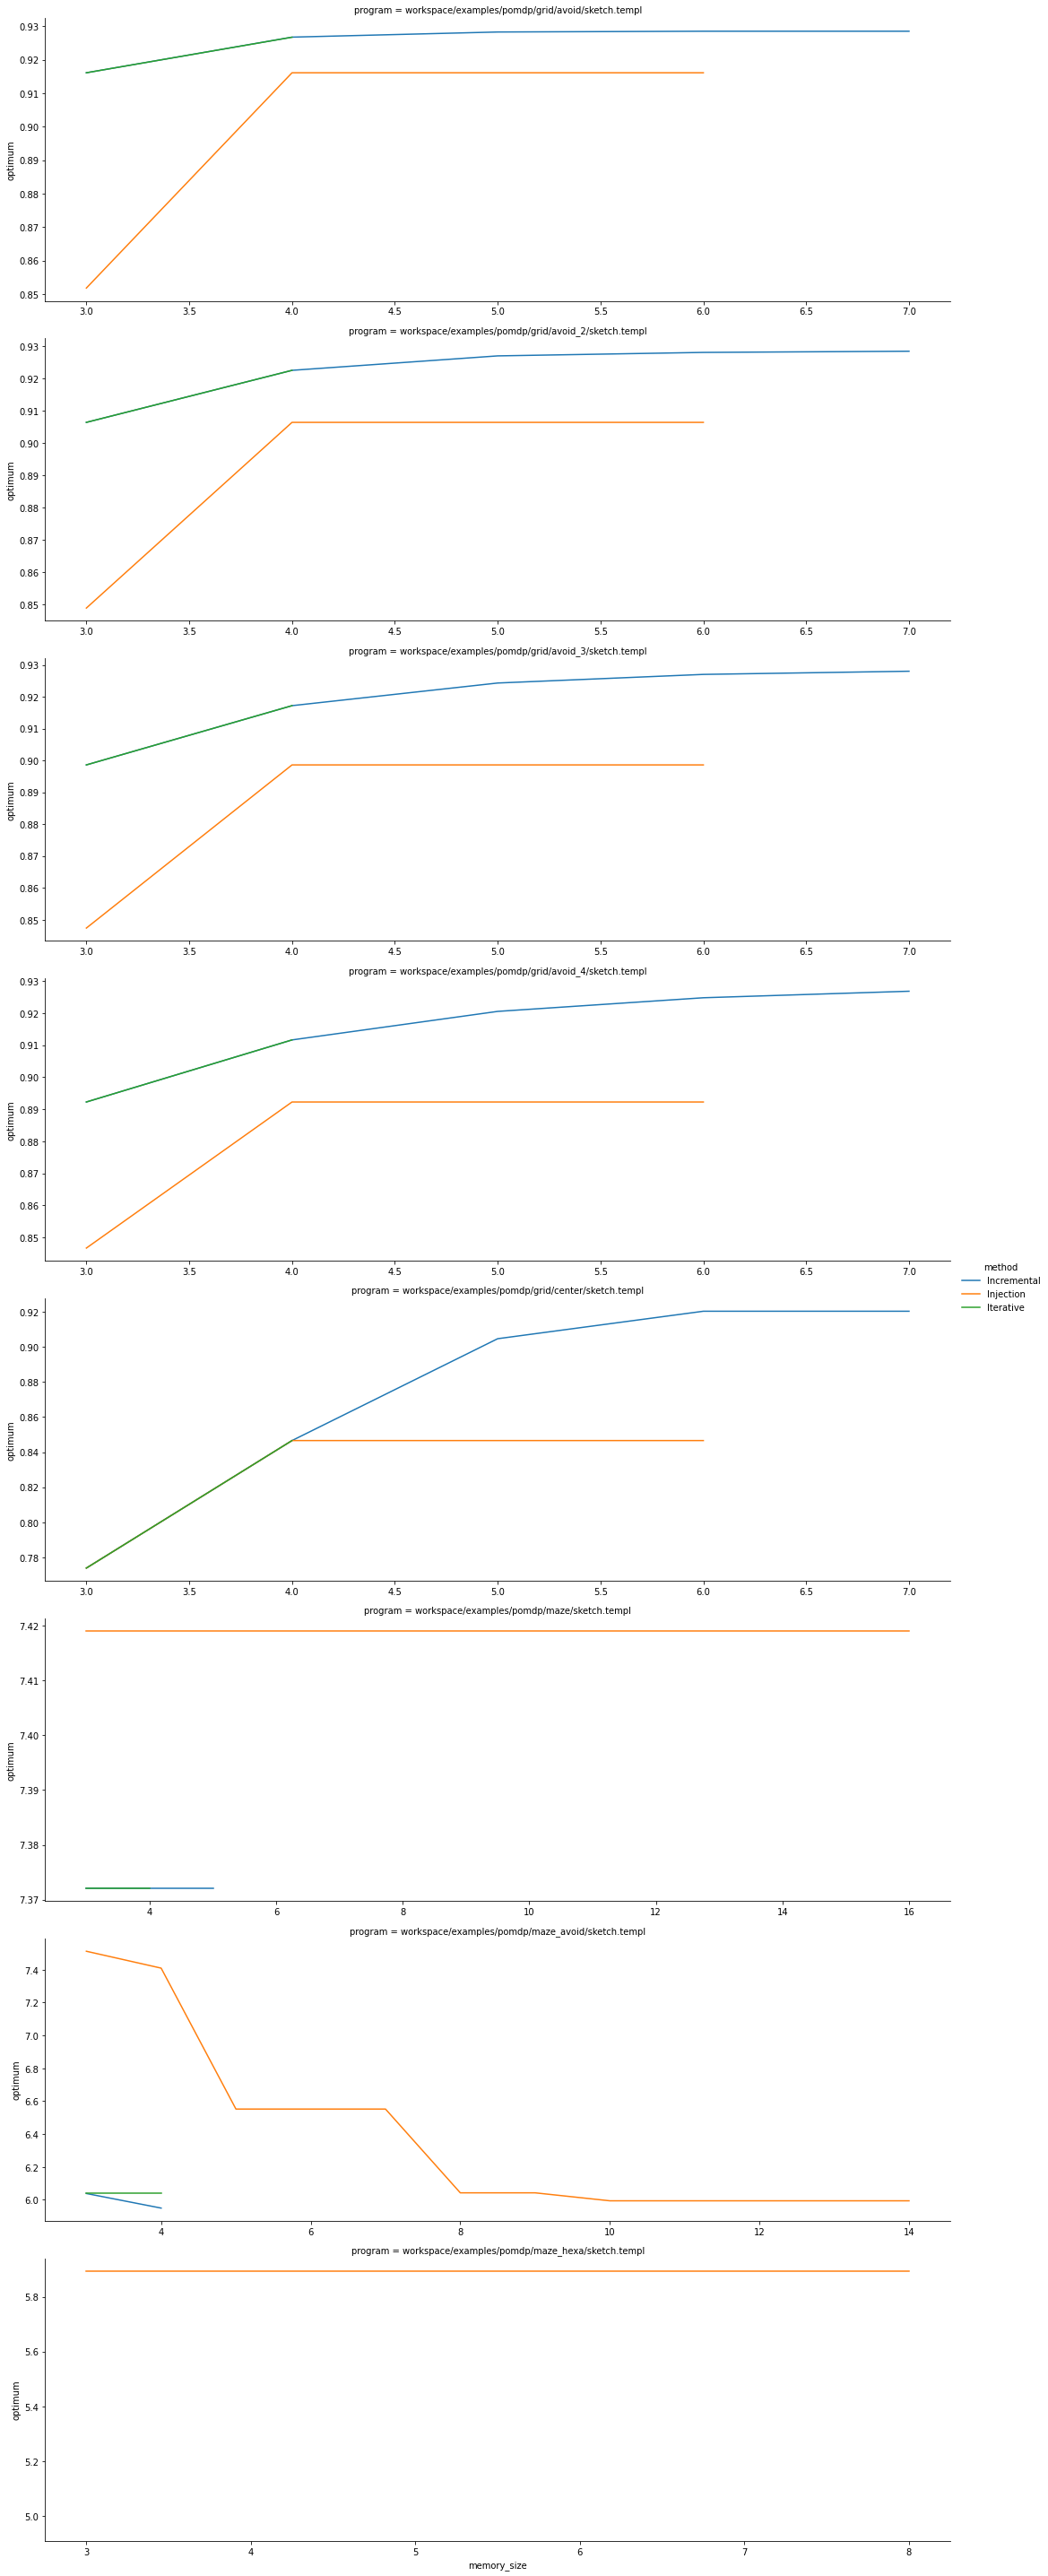

In [279]:
grid = sns.relplot(
                data=grouped, #.where(grouped["program"] == program).dropna(),
                x="memory_size",
                y="optimum",
                col="program",
                kind="line",
                hue="method",
                legend="full",
                aspect=3,
                col_wrap=1,
                facet_kws={'sharey': False, 'sharex': False}
            )
# grid.savefig("../workspace/log/" +
#              program[25:].replace("/", "_") + "_opt.png")


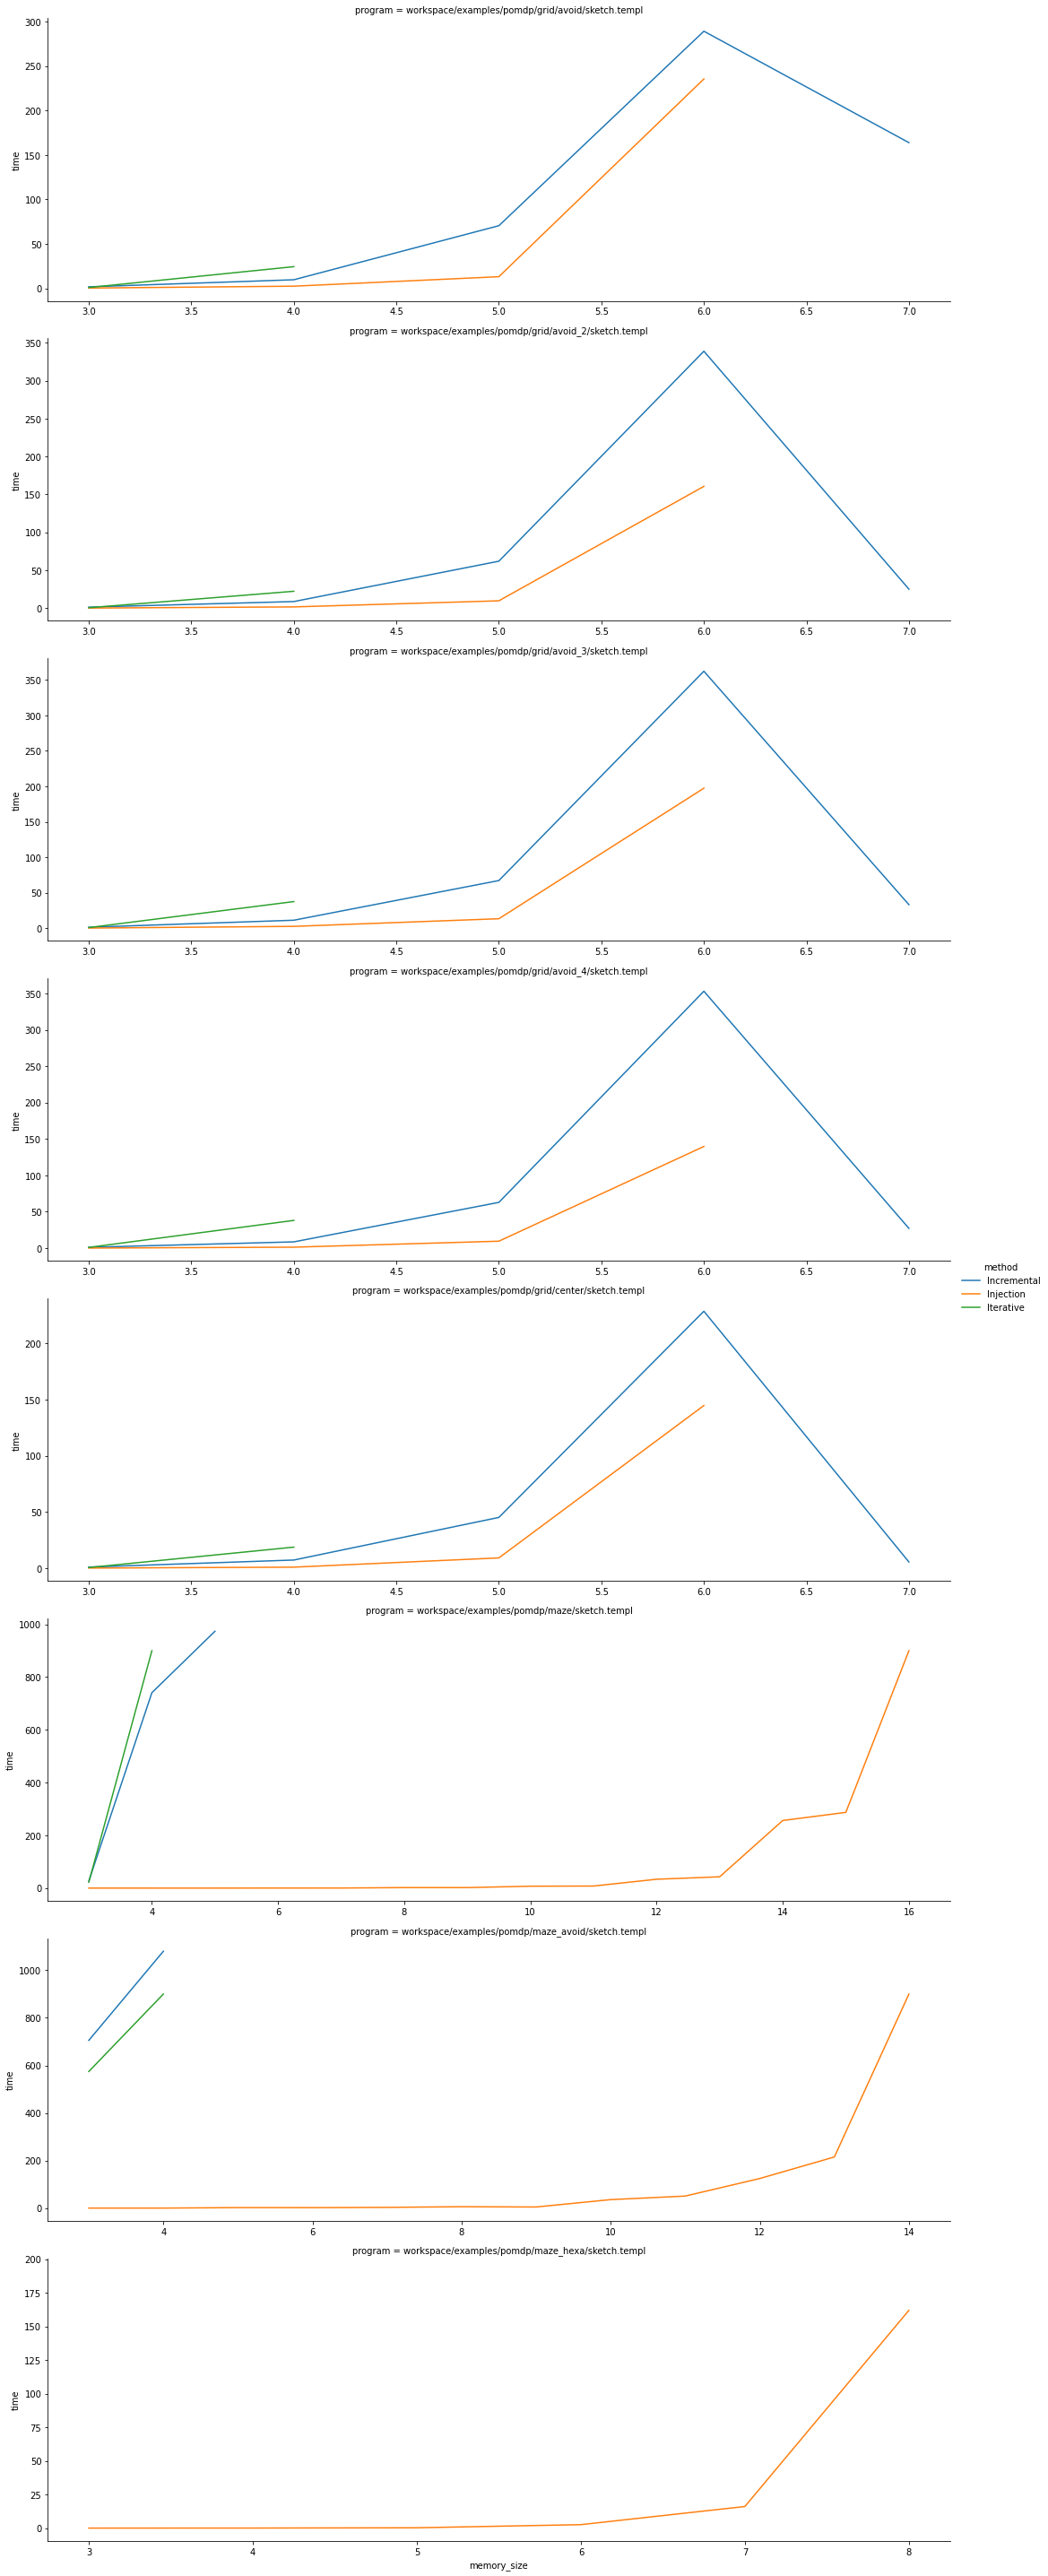

In [280]:
grid = sns.relplot(
                data=grouped, #.where(grouped["program"] == program).dropna(),
                x="memory_size",
                y="time",
                col="program",
                kind="line",
                hue="method",
                legend="full",
                aspect=3,
                col_wrap=1,
                facet_kws={'sharey': False, 'sharex': False}
            )


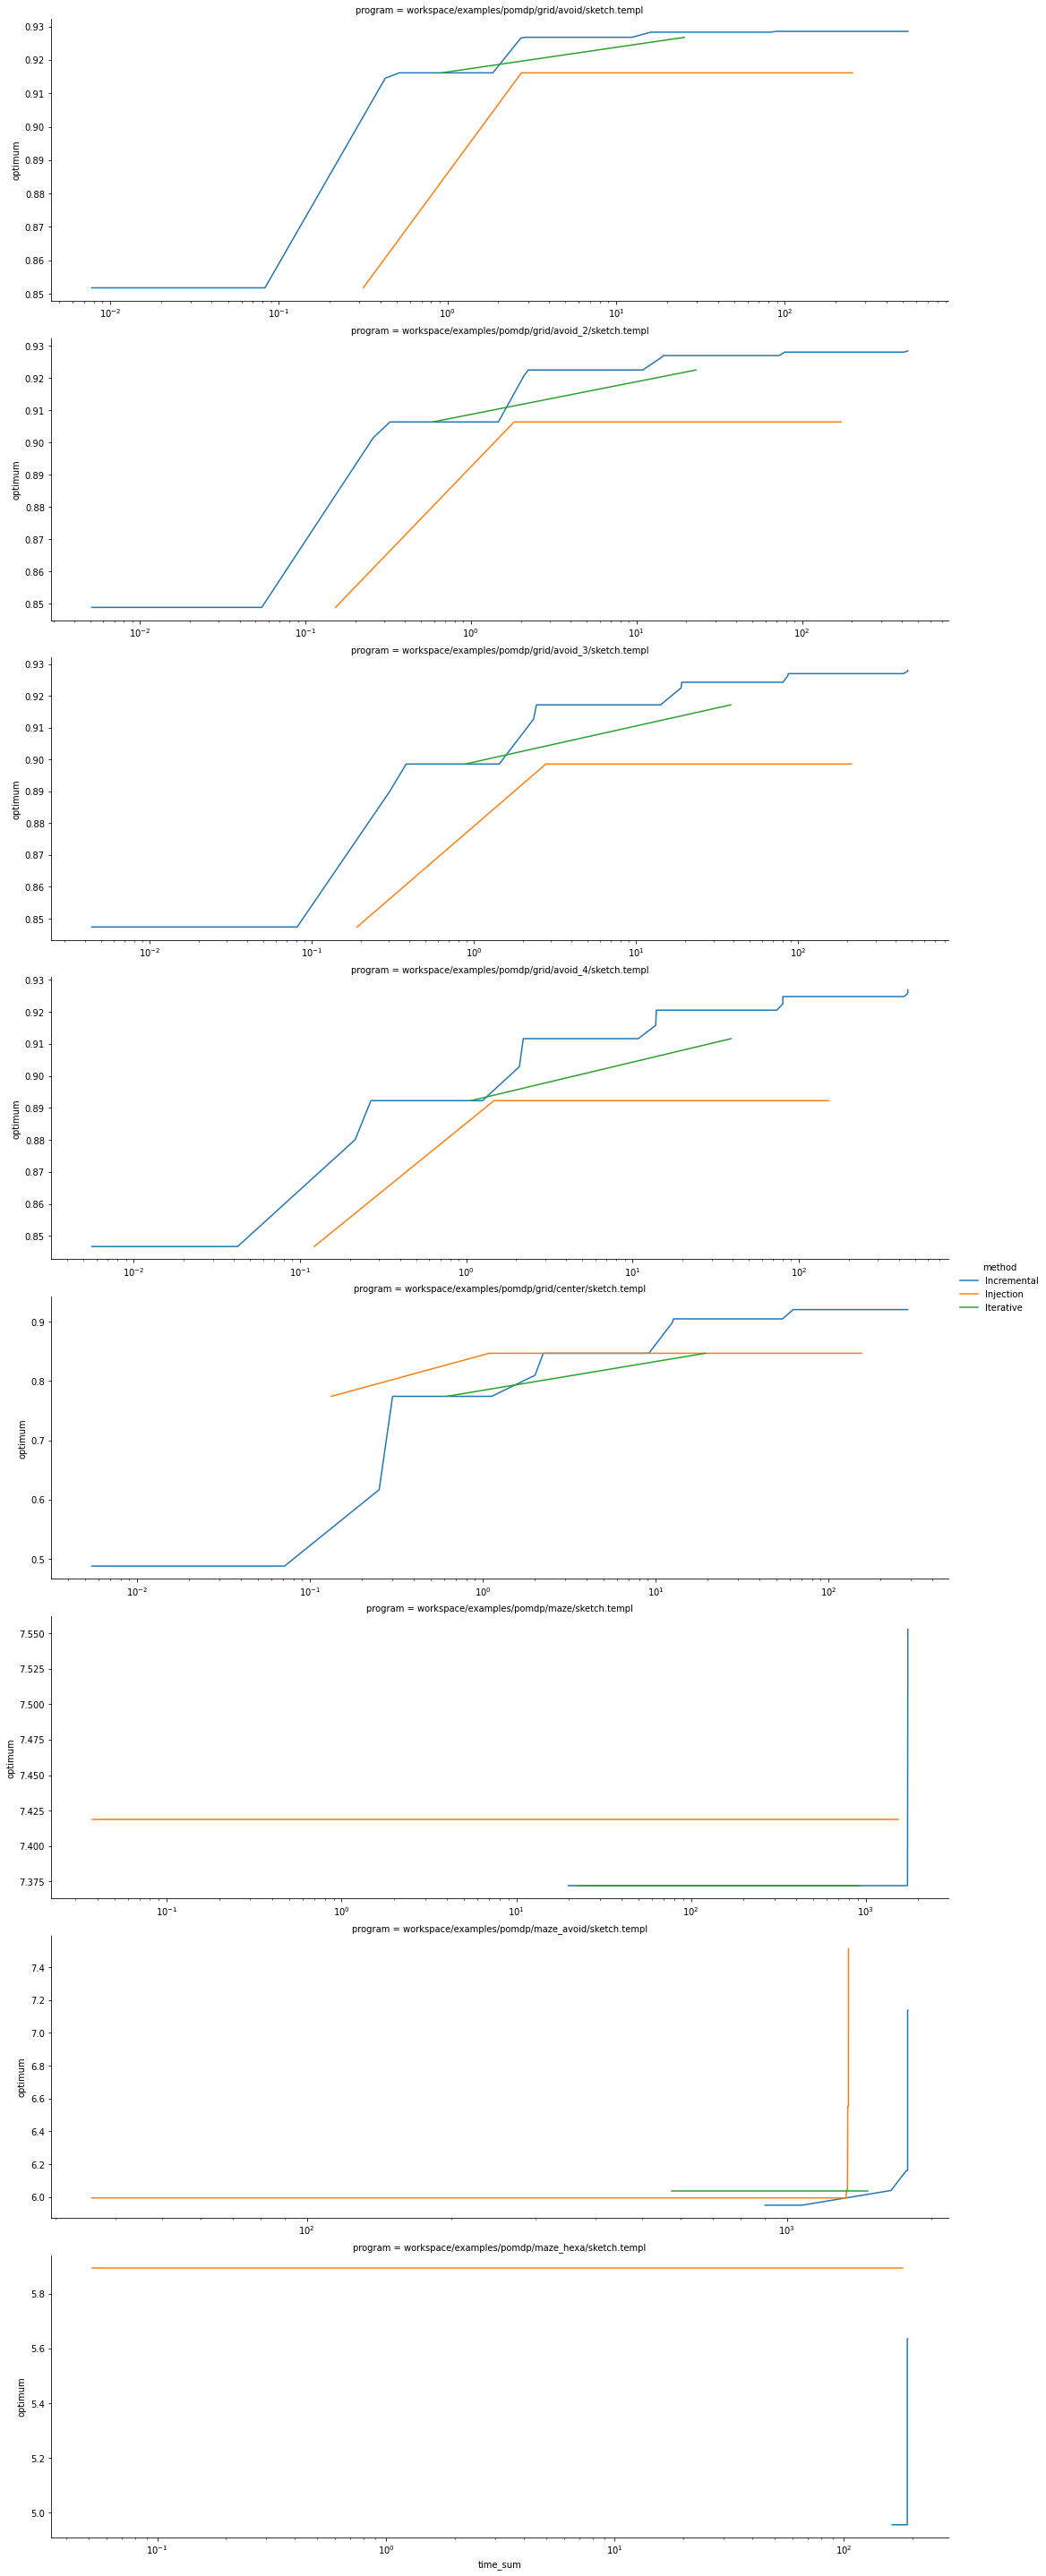

In [281]:
out = out.sort_values(["program", "method", "optimum"])
out["time_sum"] = out.groupby(["program", "method"]).time.transform(pd.Series.cumsum)
grid = sns.relplot(
                data=out, 
                x="time_sum",
                y="optimum",
                col="program",
                kind="line",
                hue="method",
                legend="full",
                aspect=3,
                col_wrap=1,
                facet_kws={'sharey': False, 'sharex': False},
            )
grid.set(xscale="log")